## Analyze Financial Data

This is a project launched at Codecademy and it is a part of skill path Analyze Financial Data with Python. More information [here](https://www.codecademy.com/learn/paths/finance-python)

## Introduction

You are working as a wealth manager at a small firm where you have clients seeking advice on how to invest their money. A young client wants to invest a large amount of their savings in a portfolio of stocks, but they are unsure of what stocks to invest in and at what amounts.

In this capstone project, you will create a presentation that showcases a portfolio of stocks that you recommend your client invest in, and provide the weights at which they should invest in each stock depending on their risk preference.

## About Stocks

I randomly chosen 7 companies which are included in SAP500 index:
  * AAPL: Apple --> Electronics 
  * CSCO: Cisco System --> Telecommunication 
  * KO: Coca-Cola --> Food Industry
  * GD: General Dynamics Corporation --> Aviation Industry 
  * JPM: JPMorgan Chese&Co --> Finances 
  * XPO: XPO Logistics --> Logistics
  * TSLA: Tesla --> Automotive Industry

The deadline for this project was chosen for me. I decided to analyze 7 companies from January 2020. Until the end of March 2021. This was the time when the global pandemic started, so I thought it would be interesting to show how different companies are dealing with this unpredictable situation.

## Import Packages

In [1]:
import pandas_datareader as web
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the adjusted closings for the 7 chosen stocks

In [2]:
symbols = ['AAPL', 'CSCO', 'KO', 'GD', 'JPM', 'XPO', 'TSLA']
start_date = datetime(2020, 1, 1)
end_date = datetime(2021, 3, 31)
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

In [3]:
stock_data

Attributes   Adj Close                                                \
Symbols           AAPL       CSCO         KO          GD         JPM   
Date                                                                   
2020-01-02   74.333511  46.443089  52.731567  170.996506  134.380966   
2020-01-03   73.610840  45.685341  52.443882  172.673599  132.607590   
2020-01-06   74.197395  45.848400  52.424702  174.504044  132.502167   
2020-01-07   73.848442  45.551056  52.021954  172.520294  130.249542   
2020-01-08   75.036385  45.579834  52.117844  172.961105  131.265610   
...                ...        ...        ...         ...         ...   
2021-03-25  120.589996  50.150463  52.020000  178.900452  151.656799   
2021-03-26  121.209999  52.195801  53.040001  180.370926  154.181915   
2021-03-29  121.389999  52.146156  53.849998  182.119598  151.786026   
2021-03-30  119.900002  51.401497  53.150002  180.927322  153.575485   
2021-03-31  122.150002  51.341923  52.709999  180.390793  151.338654   

Attributes                               Close                        ...  \
Symbols            XPO        TSLA        AAPL       CSCO         KO  ...   
Date                                                                  ...   
2020-01-02   80.459999   86.052002   75.087502  48.419998  54.990002  ...   
2020-01-03   78.239998   88.601997   74.357498  47.630001  54.689999  ...   
2020-01-06   76.930000   90.307999   74.949997  47.799999  54.669998  ...   
2020-01-07   77.510002   93.811996   74.597504  47.490002  54.250000  ...   
2020-01-08   78.169998   98.428001   75.797501  47.520000  54.349998  ...   
...                ...         ...         ...        ...        ...  ...   
2021-03-25  119.330002  640.390015  120.589996  50.509998  52.020000  ...   
2021-03-26  123.209999  618.710022  121.209999  52.570000  53.040001  ...   
2021-03-29  121.410004  611.289978  121.389999  52.520000  53.849998  ...   
2021-03-30  124.059998  635.619995  119.900002  51.770000  53.150002  ...   
2021-03-31  123.300003  667.929993  122.150002  51.709999  52.709999  ...   

Attributes        Open                               Volume              \
Symbols            JPM         XPO        TSLA         AAPL        CSCO   
Date                                                                      
2020-01-02  139.789993   80.379997   84.900002  135480400.0  16708100.0   
2020-01-03  137.500000   79.300003   88.099998  146322800.0  15577400.0   
2020-01-06  136.559998   76.980003   88.094002  118387200.0  22183600.0   
2020-01-07  137.279999   76.860001   92.279999  108872000.0  16501900.0   
2020-01-08  135.699997   77.430000   94.739998  132079200.0  25175900.0   
...                ...         ...         ...          ...         ...   
2021-03-25  150.000000  115.779999  613.000000   98844700.0  34537700.0   
2021-03-26  154.300003  120.669998  641.869995   93958900.0  31984200.0   
2021-03-29  152.119995  122.449997  615.640015   80819200.0  25032800.0   
2021-03-30  154.460007  121.650002  601.750000   85671900.0  22465100.0   
2021-03-31  153.279999  123.870003  646.619995  118323800.0  22212400.0   

Attributes                                                            
Symbols             KO         GD         JPM       XPO         TSLA  
Date                                                                  
2020-01-02  11867700.0  1472100.0  10803700.0  531200.0   47660500.0  
2020-01-03  11354500.0  1662200.0  10386800.0  857100.0   88892500.0  
2020-01-06  14698300.0  1957000.0  10259000.0  937000.0   50665000.0  
2020-01-07   9973900.0  1454600.0  10531300.0  610600.0   89410500.0  
2020-01-08  10676000.0  1226400.0   9695300.0  711600.0  155721500.0  
...                ...        ...         ...       ...          ...  
2021-03-25  17091900.0  1015400.0  15608300.0  647300.0   39224900.0  
2021-03-26  17125100.0  1059700.0  16750100.0  607700.0   33778400.0  
2021-03-29  17514100.0  1711400.0  17570300.0  671900.0   28637000.0  
2021-03-3

In [4]:
stock_data['Adj Close']

Symbols,AAPL,CSCO,KO,GD,JPM,XPO,TSLA
Date,,,,,,,
2020-01-02,74.333511,46.443089,52.731567,170.996506,134.380966,80.459999,86.052002
2020-01-03,73.610840,45.685341,52.443882,172.673599,132.607590,78.239998,88.601997
2020-01-06,74.197395,45.848400,52.424702,174.504044,132.502167,76.930000,90.307999
2020-01-07,73.848442,45.551056,52.021954,172.520294,130.249542,77.510002,93.811996
2020-01-08,75.036385,45.579834,52.117844,172.961105,131.265610,78.169998,98.428001
...,...,...,...,...,...,...,...
2021-03-25,120.589996,50.150463,52.020000,178.900452,151.656799,119.330002,640.390015
2021-03-26,121.209999,52.195801,53.040001,180.370926,154.181915,123.209999,618.710022
2021-03-29,121.389999,52.146156,53.849998,182.119598,151.786026,121.410004,611.289978


## Plot the adjusted closing prices over time

First I will separate data contains `Adj Close` into variable `stock_close`

In [5]:
stock_close = stock_data['Adj Close']

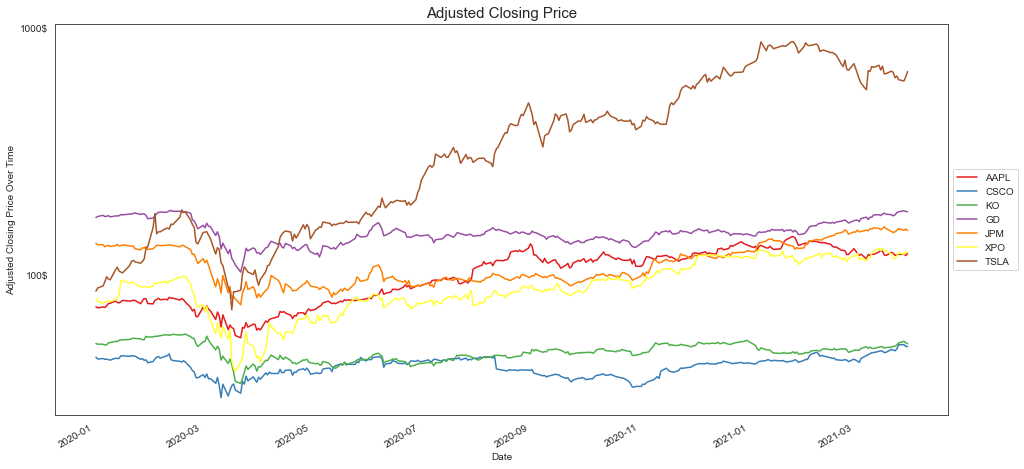

In [6]:
sns.set_style('white')
sns.set_palette('Set1')

ax = stock_close.plot(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price Over Time')

plt.yscale('log')
plt.yticks([100, 1000], ['100$', '1000$'])


plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Adjusted Closing Price', size=15)
plt.savefig('Adjusted Closing Price.png');

**Note:** I used a logarithmic scale on axis y to better visualize the line graph. I did it because Tesla stock price are higher than price of others stocks in my portfolio. 

## Calculate and plot the daily simple rate of return over time

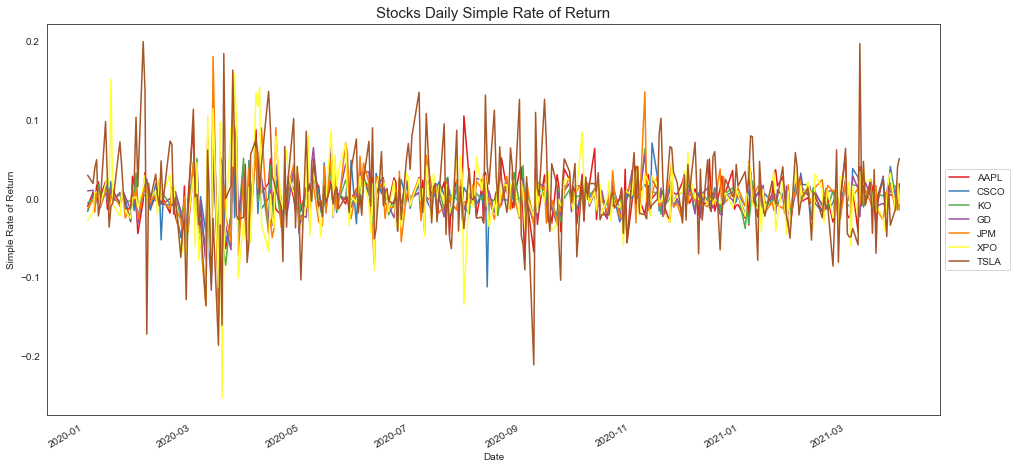

In [7]:
stock_daily_returns = stock_close.pct_change()

stock_daily_returns.plot(figsize=(16, 8))
plt.xlabel('Date')
plt.ylabel('Simple Rate of Return')
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Stocks Daily Simple Rate of Return', size=15)
plt.savefig('Stocks Daily Simple Rate of Return.png');

In order to better visualize the daily simple rate of return I will plot the graphs for each stocks companies separately. 

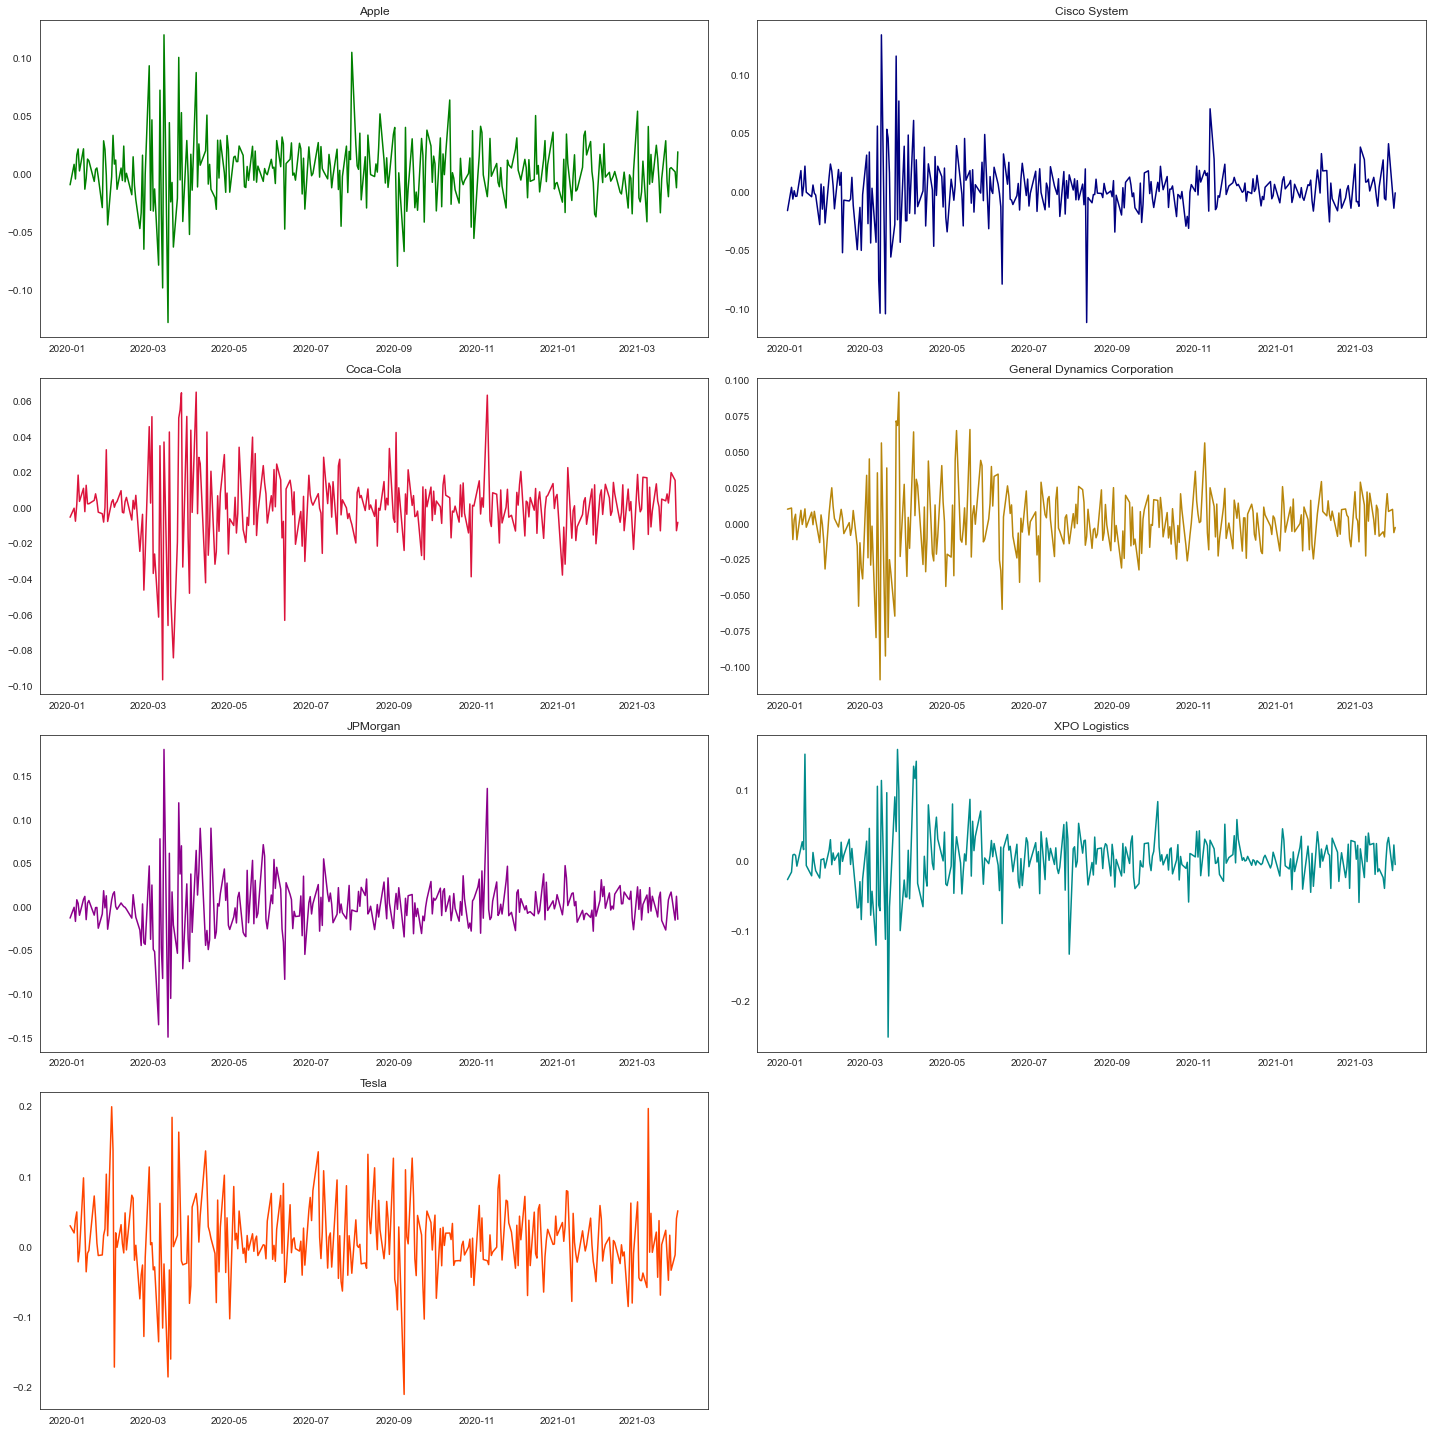

In [8]:
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)

ax1.plot(stock_data['Adj Close']['AAPL'].pct_change(), color='green')
ax1.set_title("Apple")

ax2.plot(stock_data['Adj Close']['CSCO'].pct_change(), color='navy')
ax2.set_title("Cisco System")

ax3.plot(stock_data['Adj Close']['KO'].pct_change(), color='Crimson')
ax3.set_title("Coca-Cola")

ax4.plot(stock_data['Adj Close']['GD'].pct_change(), color='DarkGoldenRod')
ax4.set_title("General Dynamics Corporation")

ax5.plot(stock_data['Adj Close']['JPM'].pct_change(), color='DarkMagenta')
ax5.set_title("JPMorgan")

ax6.plot(stock_data['Adj Close']['XPO'].pct_change(), color='DarkCyan')
ax6.set_title('XPO Logistics')

ax7.plot(stock_data['Adj Close']['TSLA'].pct_change(), color='OrangeRed')
ax7.set_title('Tesla')


plt.tight_layout()
plt.savefig('Separately Stocks Daily Simple Rate of Return.png');

## Calculate and plot the mean of each stock's daily simple rate of return

In [9]:
daily_mean = stock_daily_returns.mean()
daily_mean

Symbols
AAPL    0.001978
CSCO    0.000619
KO      0.000207
GD      0.000449
JPM     0.000873
XPO     0.002208
TSLA    0.008058
dtype: float64

In [10]:
daily_mean.keys()

Index(['AAPL', 'CSCO', 'KO', 'GD', 'JPM', 'XPO', 'TSLA'], dtype='object', name='Symbols')

In [11]:
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])

In [12]:
height

[0.001978249536786809,
 0.0006191866293160648,
 0.00020742262800865633,
 0.0004489002035711853,
 0.000873171814445195,
 0.0022081415454143958,
 0.00805789785078334]

In [13]:
x_pos = np.arange(len(daily_mean.keys()))
x_pos

array([0, 1, 2, 3, 4, 5, 6])

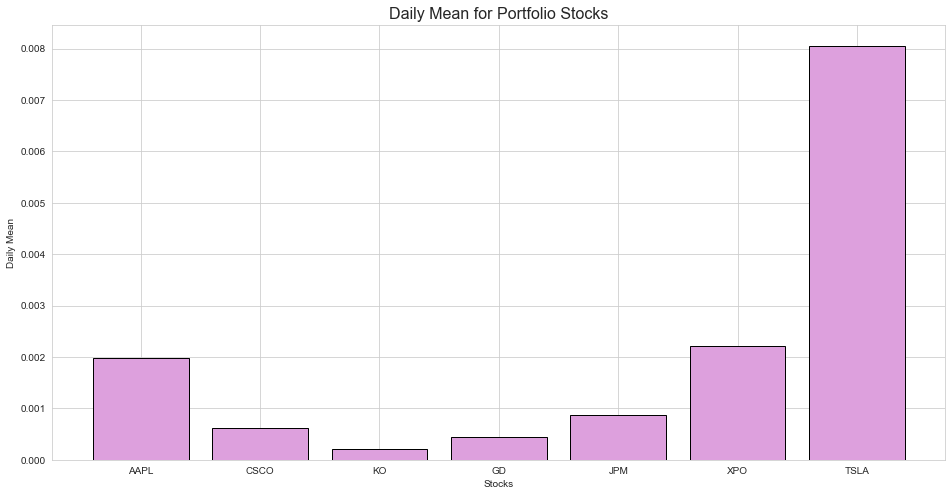

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.bar(x_pos, height, color='Plum', edgecolor='black')
plt.xticks(x_pos, daily_mean.keys())
plt.xlabel("Stocks")
plt.ylabel("Daily Mean")
plt.title("Daily Mean for Portfolio Stocks", size=16)
plt.savefig('daily_mean_for_stocks.png');

Tesla has the highest mean simple rate of return over the period of data collected. Thus Tesla would have been a good choice for investment over this period of time. Coca-Cola, on the other hand, has the lowest mean simple rate of return over the period.

## Calculate and plot the variance

In [15]:
daily_var = stock_daily_returns.var()
daily_var

Symbols
AAPL    0.000783
CSCO    0.000598
KO      0.000415
GD      0.000554
JPM     0.000994
XPO     0.001666
TSLA    0.002991
dtype: float64

In [16]:
daily_var.keys()

Index(['AAPL', 'CSCO', 'KO', 'GD', 'JPM', 'XPO', 'TSLA'], dtype='object', name='Symbols')

In [17]:
variance = []
for key in daily_var.keys():
    variance.append(daily_var[key])

In [18]:
variance

[0.000782532342813202,
 0.0005983186056511878,
 0.0004154076922577615,
 0.0005543434553236094,
 0.000993919572187139,
 0.0016656932276175867,
 0.0029909291667964528]

In [19]:
x_pos = np.arange(len(daily_var.keys()))
x_pos

array([0, 1, 2, 3, 4, 5, 6])

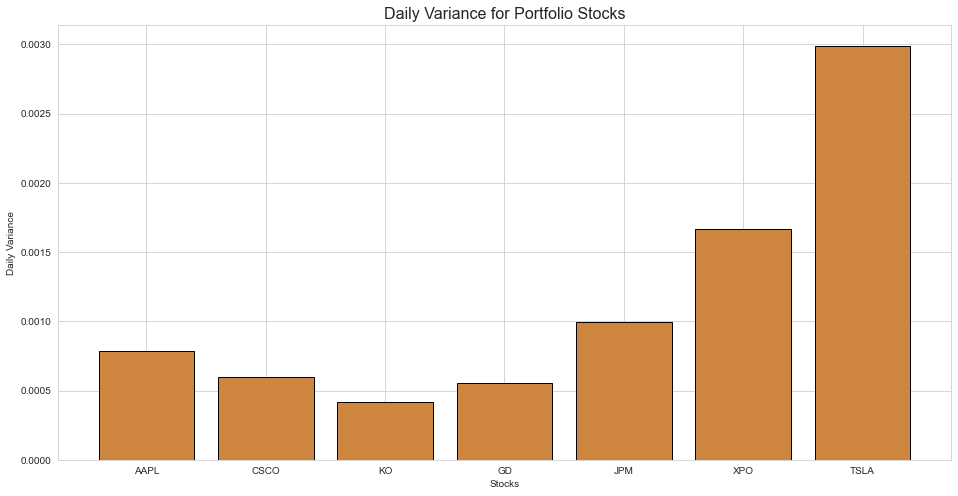

In [20]:
plt.figure(figsize=(16,8))
plt.bar(x_pos, variance, color='Peru', edgecolor='black')
plt.xticks(x_pos, daily_var.keys())
plt.xlabel("Stocks")
plt.ylabel("Daily Variance")
plt.title("Daily Variance for Portfolio Stocks", size=16)
plt.savefig('daily_variance_for_stocks.png');

Tesla shows the highest variance of all the stocks, indicating it can be a riskier investment. Coca-Cola shows the lowest variance, indicating that the returns are more predictable. 

##  Calculate and plot the standard deviation

In [21]:
stock_std = stock_daily_returns.std()
stock_std

Symbols
AAPL    0.027974
CSCO    0.024461
KO      0.020382
GD      0.023544
JPM     0.031526
XPO     0.040813
TSLA    0.054689
dtype: float64

In [22]:
stock_std.keys()

Index(['AAPL', 'CSCO', 'KO', 'GD', 'JPM', 'XPO', 'TSLA'], dtype='object', name='Symbols')

In [23]:
std = []
for key in stock_std.keys():
    std.append(stock_std[key])

In [24]:
std

[0.027973779558958457,
 0.02446055203079415,
 0.020381552744032076,
 0.023544499470653638,
 0.031526490007407086,
 0.04081290516022581,
 0.05468938806383239]

In [25]:
x_pos = np.arange(len(stock_std.keys()))
x_pos

array([0, 1, 2, 3, 4, 5, 6])

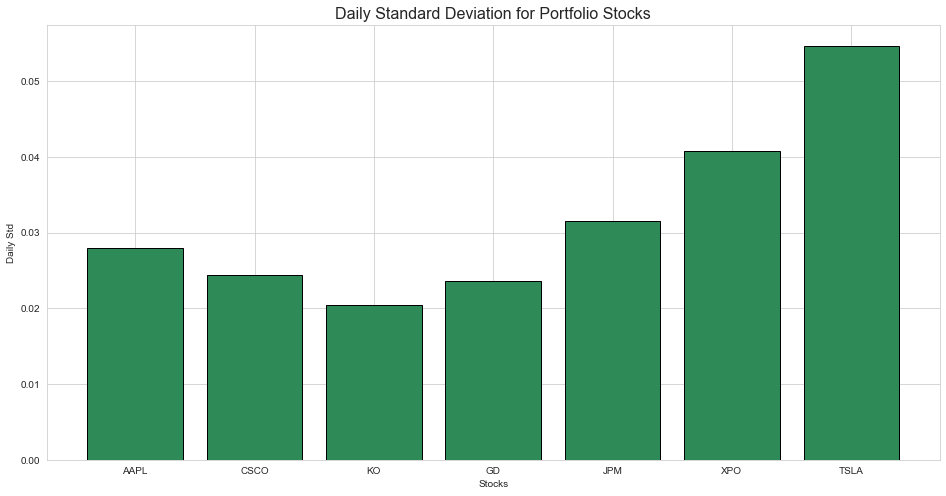

In [26]:
plt.figure(figsize=(16,8))
plt.bar(x_pos, std, color='SeaGreen', edgecolor='black')
plt.xticks(x_pos, stock_std.keys())
plt.xlabel("Stocks")
plt.ylabel("Daily Std")
plt.title("Daily Standard Deviation for Portfolio Stocks", size=16)
plt.savefig('daily_std_for_stocks.png');

It is hard to answer the question which stock should investor choose to invest and why. The answer to this question depends on investment preferences. Tesla is the most volatile stock, as it has the largest standard deviation. It also, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Coca-Cola, on the other hand, is the least volatile stock, but has the lowest mean return.

## Calculate the correlations

In [27]:
corelation = stock_daily_returns.corr()
corelation

Symbols,AAPL,CSCO,KO,GD,JPM,XPO,TSLA
Symbols,,,,,,,
AAPL,1.000000,0.632452,0.531321,0.444295,0.479236,0.427497,0.492947
CSCO,0.632452,1.000000,0.594984,0.595689,0.596537,0.440208,0.278878
KO,0.531321,0.594984,1.000000,0.761871,0.693026,0.581349,0.265989
GD,0.444295,0.595689,0.761871,1.000000,0.789620,0.620986,0.246309
JPM,0.479236,0.596537,0.693026,0.789620,1.000000,0.622292,0.277441
XPO,0.427497,0.440208,0.581349,0.620986,0.622292,1.000000,0.333819
TSLA,0.492947,0.278878,0.265989,0.246309,0.277441,0.333819,1.000000


None of the stocks are negatively correlated. General Dynamics Corporation and JPMorgan are highly correlated, while General Dynamics Corporation and Tesla exhibit the lowest correlation.

In [28]:
corelation.to_excel('correlation.xlsx')

## Calculate the covariance

In [29]:
covariance = stock_daily_returns.cov()
covariance

Symbols,AAPL,CSCO,KO,GD,JPM,XPO,TSLA
Symbols,,,,,,,
AAPL,0.000783,0.000433,0.000303,0.000293,0.000423,0.000488,0.000754
CSCO,0.000433,0.000598,0.000297,0.000343,0.000460,0.000439,0.000373
KO,0.000303,0.000297,0.000415,0.000366,0.000445,0.000484,0.000296
GD,0.000293,0.000343,0.000366,0.000554,0.000586,0.000597,0.000317
JPM,0.000423,0.000460,0.000445,0.000586,0.000994,0.000801,0.000478
XPO,0.000488,0.000439,0.000484,0.000597,0.000801,0.001666,0.000745
TSLA,0.000754,0.000373,0.000296,0.000317,0.000478,0.000745,0.002991


All stocks have positively covariance but results are very small. On the other hand in order to limit the investment risk, instruments with the lowest interdependence are preferred. 

In [30]:
covariance.to_excel('covariance.xlsx')

## Mean-Variance Portfolio Optimisation

#### paste function return_portfolios() and optimal_portfolio()

In [31]:
import cvxopt as opt
from cvxopt import blas, solvers

In [32]:
def return_portfolios(expected_returns, cov_matrix):
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 5000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
    for counter,symbol in enumerate(selected):
        portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
    df = df[column_order]
   
    return df

In [33]:
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.to_numpy())

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

#### Efficient Frontier

In [34]:
df = return_portfolios(daily_mean, covariance)

In [35]:
weights, returns, risks = optimal_portfolio(stock_daily_returns[1:])

     pcost       dcost       gap    pres   dres
 0: -2.0731e-03 -1.0080e+00  1e+00  0e+00  3e+00
 1: -2.0862e-03 -1.7999e-02  2e-02  6e-17  5e-02
 2: -3.0623e-03 -8.0721e-03  5e-03  2e-16  1e-02
 3: -7.5799e-03 -9.3003e-03  2e-03  2e-15  8e-18
 4: -7.8948e-03 -7.9223e-03  3e-05  3e-18  5e-18
 5: -7.9082e-03 -7.9085e-03  3e-07  2e-16  5e-18
 6: -7.9084e-03 -7.9084e-03  3e-09  2e-16  5e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0697e-03 -1.0080e+00  1e+00  3e-17  3e+00
 1: -2.0827e-03 -1.7992e-02  2e-02  1e-16  5e-02
 2: -3.0570e-03 -8.0617e-03  5e-03  1e-16  1e-02
 3: -7.5601e-03 -9.2775e-03  2e-03  3e-15  4e-18
 4: -7.8764e-03 -7.9040e-03  3e-05  2e-16  5e-18
 5: -7.8900e-03 -7.8902e-03  3e-07  1e-16  4e-18
 6: -7.8901e-03 -7.8901e-03  3e-09  3e-16  5e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0658e-03 -1.0080e+00  1e+00  6e-17  3e+00
 1: -2.0788e-03 -1.7984e-02  2e-02  8e-17  5e-02
 2: -3.0510e-03 -8.0499e

     pcost       dcost       gap    pres   dres
 0:  1.4556e-03 -1.0008e+00  1e+00  3e-17  3e+00
 1:  1.4519e-03 -1.0789e-02  1e-02  6e-17  4e-02
 2:  1.2775e-03  8.2478e-05  1e-03  2e-16  3e-03
 3:  1.0502e-03  8.2285e-04  2e-04  5e-17  5e-04
 4:  9.6063e-04  9.3835e-04  2e-05  7e-17  2e-18
 5:  9.4702e-04  9.4631e-04  7e-07  8e-17  1e-18
 6:  9.4641e-04  9.4640e-04  7e-09  1e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8854e-03 -9.9994e-01  1e+00  0e+00  3e+00
 1:  1.8815e-03 -9.9197e-03  1e-02  9e-17  4e-02
 2:  1.6967e-03  8.0534e-04  9e-04  8e-17  3e-03
 3:  1.3937e-03  1.2056e-03  2e-04  1e-16  2e-18
 4:  1.3394e-03  1.3248e-03  1e-05  1e-16  3e-18
 5:  1.3303e-03  1.3301e-03  3e-07  1e-16  2e-18
 6:  1.3301e-03  1.3301e-03  3e-09  8e-17  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.3665e-03 -9.9896e-01  1e+00  6e-17  3e+00
 1:  2.3623e-03 -8.9486e-03  1e-02  9e-17  3e-02
 2:  2.1526e-03  1.1676e

 6:  1.4839e-01  1.4839e-01  5e-09  1e-16  9e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9278e-01 -8.7182e-01  1e+00  2e-16  3e+00
 1:  1.8758e-01  1.2340e-01  6e-02  7e-17  2e-01
 2:  1.6953e-01  1.5731e-01  1e-02  7e-17  2e-16
 3:  1.6676e-01  1.6610e-01  7e-04  1e-16  2e-16
 4:  1.6657e-01  1.6654e-01  3e-05  6e-17  7e-17
 5:  1.6656e-01  1.6656e-01  4e-07  2e-16  1e-16
 6:  1.6656e-01  1.6656e-01  4e-09  1e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1357e-01 -8.5413e-01  1e+00  2e-16  3e+00
 1:  2.0797e-01  1.4179e-01  7e-02  1e-16  2e-01
 2:  1.8984e-01  1.7791e-01  1e-02  1e-16  2e-16
 3:  1.8713e-01  1.8651e-01  6e-04  8e-17  1e-16
 4:  1.8696e-01  1.8694e-01  2e-05  2e-16  1e-16
 5:  1.8696e-01  1.8696e-01  3e-07  3e-17  2e-16
 6:  1.8696e-01  1.8696e-01  3e-09  3e-17  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.3661e-01 -8.3412e-01  1e+00  2e-16  3e+00


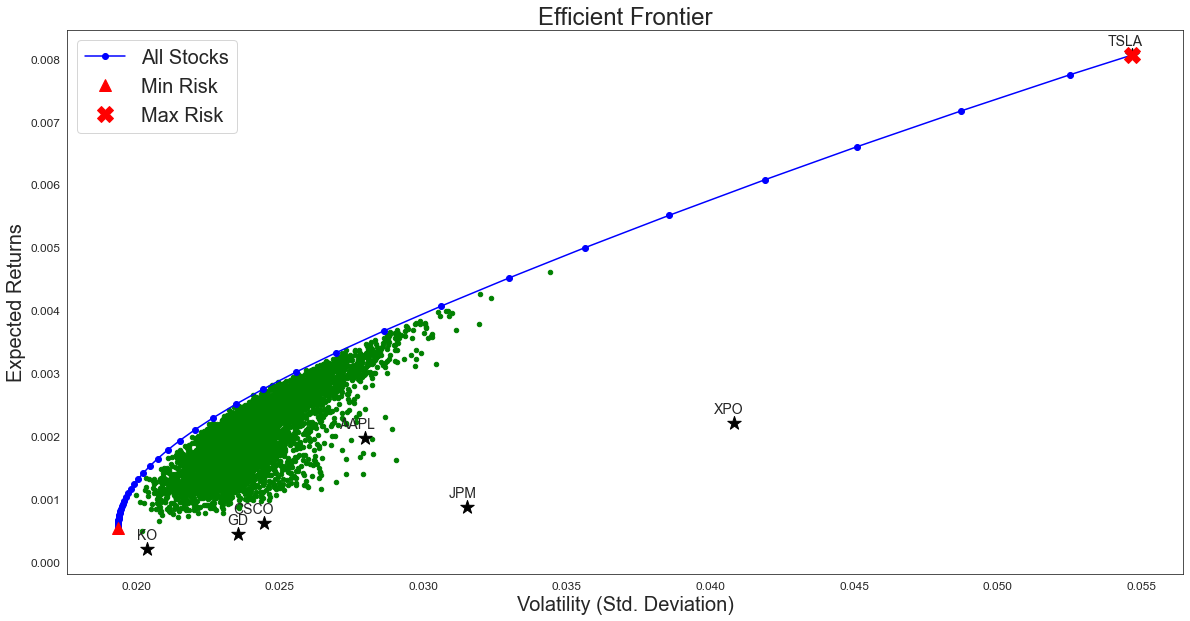

In [36]:
min_risk_idx = np.array(risks).argmin()
max_return_idx = np.array(risks).argmax()
min_risk = [risks[min_risk_idx], returns[min_risk_idx]]
max_return = [risks[max_return_idx], returns[max_return_idx]]

sns.set_style('white')
df.plot.scatter(x='Volatility', y='Returns', fontsize=12, figsize=(20,10), color='green')

plt.plot(risks, returns, 'b-o')
plt.plot(min_risk[0],min_risk[1],'r^', markersize=12)
plt.plot(max_return[0],max_return[1],'rX',markersize=16)

#How to put labels right next to the spots?
single_asset_std = np.sqrt(np.diagonal(covariance))
plt.scatter(single_asset_std, daily_mean, marker='*', color='black', s=200)
for i, txt in enumerate(stock_daily_returns.keys()):
    plt.annotate(txt, (single_asset_std[i], daily_mean[i]), size=14, xytext=(10,10), ha='right', textcoords='offset points')

plt.ylabel('Expected Returns', fontsize=20)
plt.xlabel('Volatility (Std. Deviation)', fontsize=20)
plt.title('Efficient Frontier', fontsize=24)
plt.legend(['All Stocks', 'Min Risk', 'Max Risk'], fontsize = 20, loc="upper left")
plt.savefig('efficient_frontier.png');

#### Low risk portfolio without TESLA 

In [37]:
stock_noTSLA = web.get_data_yahoo(['AAPL', 'CSCO', 'KO', 'GD', 'JPM', 'XPO'], start_date, end_date)
stock_daily_returns_noTSLA = stock_noTSLA['Adj Close'].pct_change()
weights_noTSLA, returns_noTSLA, risks_noTSLA = optimal_portfolio(stock_daily_returns_noTSLA[1:])

     pcost       dcost       gap    pres   dres
 0: -1.0335e-03 -1.0022e+00  1e+00  6e-17  3e+00
 1: -1.0347e-03 -1.2159e-02  1e-02  8e-17  3e-02
 2: -1.1319e-03 -2.2567e-03  1e-03  9e-17  3e-03
 3: -2.0787e-03 -2.6063e-03  5e-04  2e-16  5e-04
 4: -2.1186e-03 -2.1297e-03  1e-05  1e-16  1e-05
 5: -2.1248e-03 -2.1249e-03  1e-07  2e-16  1e-07
 6: -2.1249e-03 -2.1249e-03  1e-09  1e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0304e-03 -1.0022e+00  1e+00  1e-16  3e+00
 1: -1.0315e-03 -1.2153e-02  1e-02  9e-17  3e-02
 2: -1.1286e-03 -2.2505e-03  1e-03  8e-17  3e-03
 3: -2.0692e-03 -2.5917e-03  5e-04  2e-16  5e-04
 4: -2.1080e-03 -2.1196e-03  1e-05  1e-16  1e-05
 5: -2.1146e-03 -2.1147e-03  2e-07  3e-16  1e-07
 6: -2.1147e-03 -2.1147e-03  2e-09  2e-16  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0269e-03 -1.0021e+00  1e+00  4e-16  3e+00
 1: -1.0280e-03 -1.2147e-02  1e-02  2e-16  3e-02
 2: -1.1248e-03 -2.2434e

     pcost       dcost       gap    pres   dres
 0:  9.0663e-03 -9.9505e-01  1e+00  3e-17  3e+00
 1:  9.0292e-03 -5.0299e-03  1e-02  8e-17  4e-02
 2:  7.9759e-03  5.5745e-03  2e-03  7e-17  6e-03
 3:  7.0798e-03  6.5859e-03  5e-04  2e-16  5e-18
 4:  6.9208e-03  6.8927e-03  3e-05  1e-16  5e-18
 5:  6.9017e-03  6.9013e-03  3e-07  9e-17  7e-18
 6:  6.9014e-03  6.9014e-03  3e-09  1e-16  6e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0283e-02 -9.9441e-01  1e+00  1e-16  3e+00
 1:  1.0236e-02 -4.3839e-03  1e-02  1e-16  4e-02
 2:  9.0041e-03  6.3627e-03  3e-03  1e-16  6e-03
 3:  8.0147e-03  7.4906e-03  5e-04  8e-17  1e-17
 4:  7.8397e-03  7.8125e-03  3e-05  1e-16  5e-18
 5:  7.8207e-03  7.8204e-03  3e-07  8e-17  7e-18
 6:  7.8205e-03  7.8205e-03  3e-09  7e-17  5e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1643e-02 -9.9369e-01  1e+00  6e-17  3e+00
 1:  1.1584e-02 -3.6556e-03  2e-02  1e-16  4e-02
 2:  1.0147e-02  7.2590e

 3:  1.8722e-01  1.8676e-01  5e-04  3e-17  2e-16
 4:  1.8706e-01  1.8706e-01  5e-06  8e-17  9e-17
 5:  1.8706e-01  1.8706e-01  5e-08  4e-17  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.3485e-01 -8.2804e-01  1e+00  1e-16  3e+00
 1:  2.2978e-01  1.6656e-01  6e-02  6e-17  2e-01
 2:  2.1259e-01  2.0214e-01  1e-02  1e-16  1e-16
 3:  2.1009e-01  2.0964e-01  4e-04  1e-16  1e-16
 4:  2.0995e-01  2.0994e-01  5e-06  6e-17  1e-16
 5:  2.0995e-01  2.0995e-01  5e-08  1e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.6053e-01 -8.0545e-01  1e+00  3e-16  3e+00
 1:  2.5514e-01  1.8997e-01  7e-02  3e-17  2e-01
 2:  2.3812e-01  2.2798e-01  1e-02  1e-16  2e-16
 3:  2.3574e-01  2.3532e-01  4e-04  2e-16  1e-16
 4:  2.3563e-01  2.3562e-01  4e-06  1e-16  1e-16
 5:  2.3563e-01  2.3563e-01  4e-08  8e-17  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.8902e-01 -7.7994e-01  1e+00  2e-16  3e+00


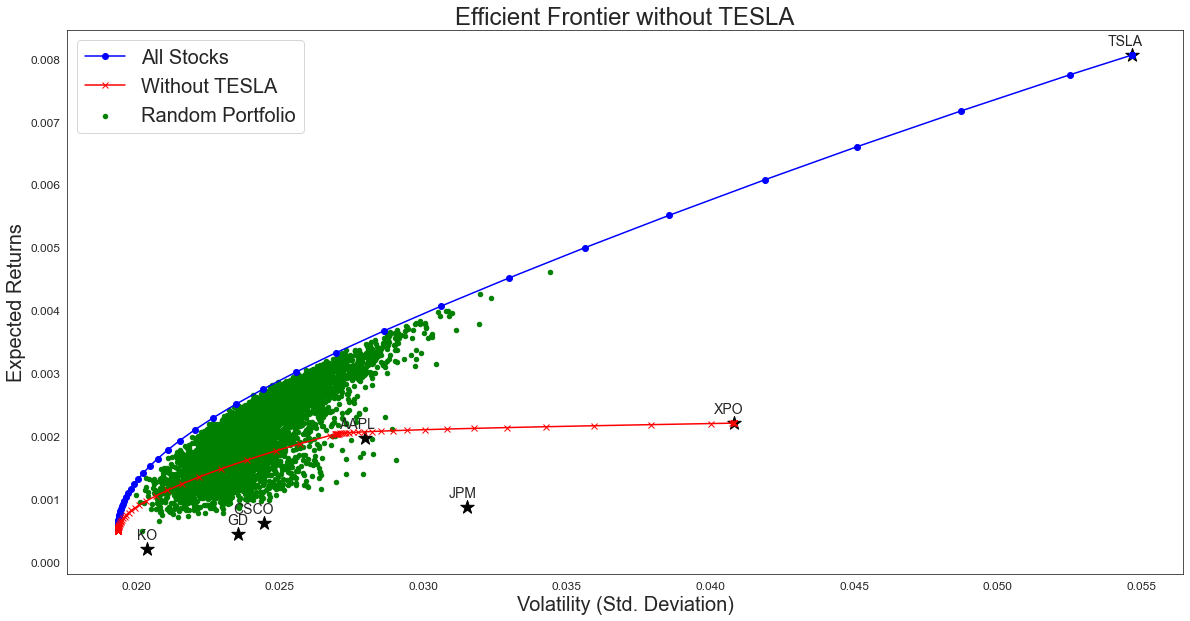

In [38]:
df.plot.scatter(x='Volatility', y='Returns', fontsize=12, figsize=(20,10), color='green')
plt.plot(risks, returns, 'b-o')

#How to put labels right next to the spots?
single_asset_std = np.sqrt(np.diagonal(covariance))
plt.scatter(single_asset_std, daily_mean, marker='*', color='black', s=200)
for i, txt in enumerate(stock_daily_returns.keys()):
    plt.annotate(txt, (single_asset_std[i], daily_mean[i]), size=14, xytext=(10,10), ha='right', textcoords='offset points')

plt.plot(risks_noTSLA, returns_noTSLA, 'r-x')    
    
plt.ylabel('Expected Returns', fontsize=20)
plt.xlabel('Volatility (Std. Deviation)', fontsize=20)
plt.title('Efficient Frontier without TESLA', fontsize=24)
plt.legend(['All Stocks', 'Without TESLA', 'Random Portfolio'], fontsize = 20, loc="upper left")
plt.savefig('efficient_frontier_without_tesla.png');

## Final Conclusion

In [39]:
print(df[(df.Volatility == df.Volatility.max())])

       Returns  Volatility  AAPL Weight  CSCO Weight  KO Weight  GD Weight  \
2629  0.004612    0.034399     0.003585     0.070021    0.00669    0.16133   

      JPM Weight  XPO Weight  TSLA Weight  
2629    0.211033    0.018208     0.529134  


In [40]:
print(df[(df.Volatility == df.Volatility.min())])

      Returns  Volatility  AAPL Weight  CSCO Weight  KO Weight  GD Weight  \
3305  0.00106    0.020006     0.224654     0.200731   0.343299   0.173455   

      JPM Weight  XPO Weight  TSLA Weight  
3305    0.010851    0.007859     0.039151  


In [41]:
print(df[(df.Returns == df.Returns.max())])

       Returns  Volatility  AAPL Weight  CSCO Weight  KO Weight  GD Weight  \
2629  0.004612    0.034399     0.003585     0.070021    0.00669    0.16133   

      JPM Weight  XPO Weight  TSLA Weight  
2629    0.211033    0.018208     0.529134  


In [42]:
print(df[(df.Returns == df.Returns.min())])

       Returns  Volatility  AAPL Weight  CSCO Weight  KO Weight  GD Weight  \
3901  0.000499    0.020197     0.002031     0.324194   0.421494   0.155535   

      JPM Weight  XPO Weight  TSLA Weight  
3901    0.060015    0.036182     0.000549  


**Summary:** 

All of this chosen stocks have not worked out an incredible returns. Perhaps chosen stocks by absolutely random to this project was not the best idea. 

Anyway as a recommendation for a client would be a choose a portfolio that fall on the efficient frontier. In our example this portfolio is Apple. 

Depending on investor acceptable level of risk a good idea would be choose a portfolio with Tesla stocks because it could increase our returns. 

High Risk Portfolio:

| Type |  Result |
| --- | --- |
| Volatility | 0.03459 |
| Returns | 0.004707 |
| AAPL Weight | 0.125956 |
| CSCO Weight |  0.016831 |
| KO Weight | 0.042719 |
| GD Weight | 0.047385 | 
| JPM Weight | 0.104954 |
| XPO Weight | 0.172688 |
| TSLA Weight | 0.489468 |

Low Risk Portfolio:

| Type |  Result |
| --- | --- |
| Volatility | 0.01986 |
| Returns |  0.000885 |
| AAPL Weight | 0.036611 |
| CSCO Weight |  0.299699 |
| KO Weight | 0.450403 |
| GD Weight | 0.120221 | 
| JPM Weight | 0.015544 |
| XPO Weight | 0.02707 |
| TSLA Weight |  0.050453 |